<a href="https://colab.research.google.com/github/drizzletechnova/Coursera-data-science-/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!pwd
!ls /content/drive/MyDrive/datasets/winequality-red.csv

/content
/content/drive/MyDrive/datasets/winequality-red.csv


In [6]:
data = pd.read_csv('/content/drive/MyDrive/datasets/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.shape

(1599, 12)

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


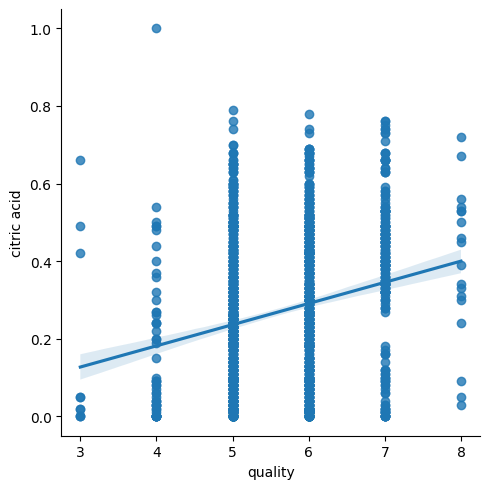

In [11]:
sns.lmplot( y='citric acid',x='quality',data=data)
plt.show()

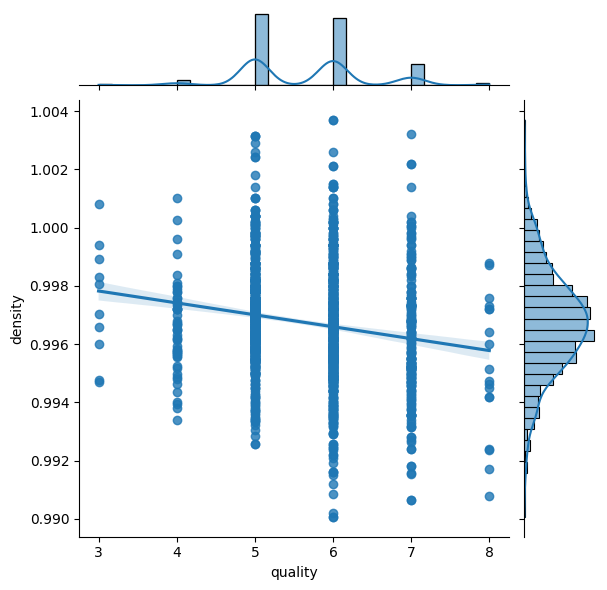

In [12]:
sns.jointplot(data=data,x='quality',y='density',kind='reg')
plt.show()

<Axes: xlabel='pH', ylabel='Count'>

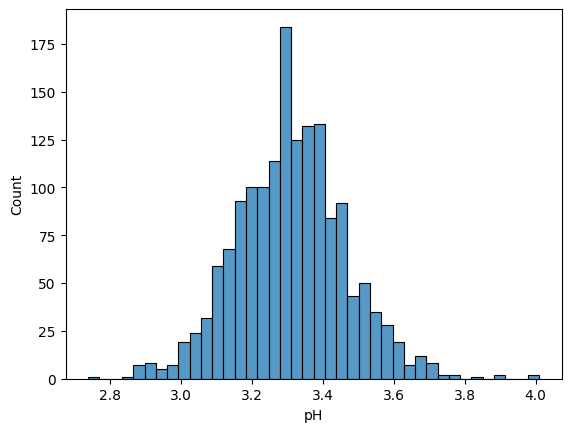

In [13]:
sns.histplot(data['pH'])

<Axes: xlabel='density', ylabel='Count'>

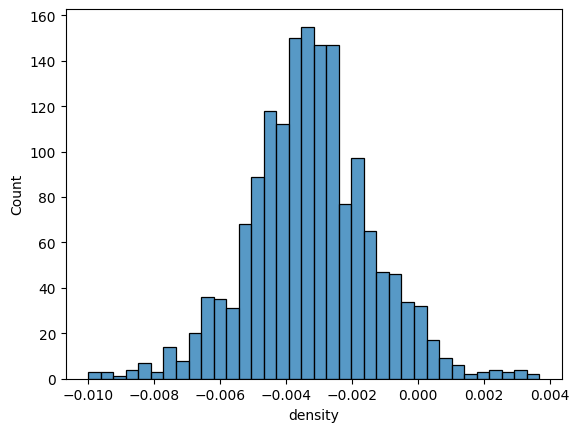

In [14]:
sns.histplot(np.log(data['density']))

In [15]:
data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [16]:
def plot_dist(df,variable,target):

    # histogram
    plt.figure(figsize=(20,4))
    plt.subplot(1,5,1)
    sns.histplot(x = variable,bins=30,data=data)
    plt.title('histogram')
    #scatter plot
    plt.subplot(1,5,2)
    sns.scatterplot(x= variable,y= target,data=data)
    plt.title('scatter')
    #boxplot
    plt.subplot(1,5,3)
    sns.boxplot(y= variable, data=data)
    plt.title('boxplot')
    plt.xlabel(variable)
    #barplot
    plt.subplot(1,5,4)
    sns.barplot(y= variable,data=data)
    plt.title('barplot')
    #regplot
    plt.subplot(1,5,5)
    sns.regplot(y= target,x=variable,data=data)
    plt.title('regplot')

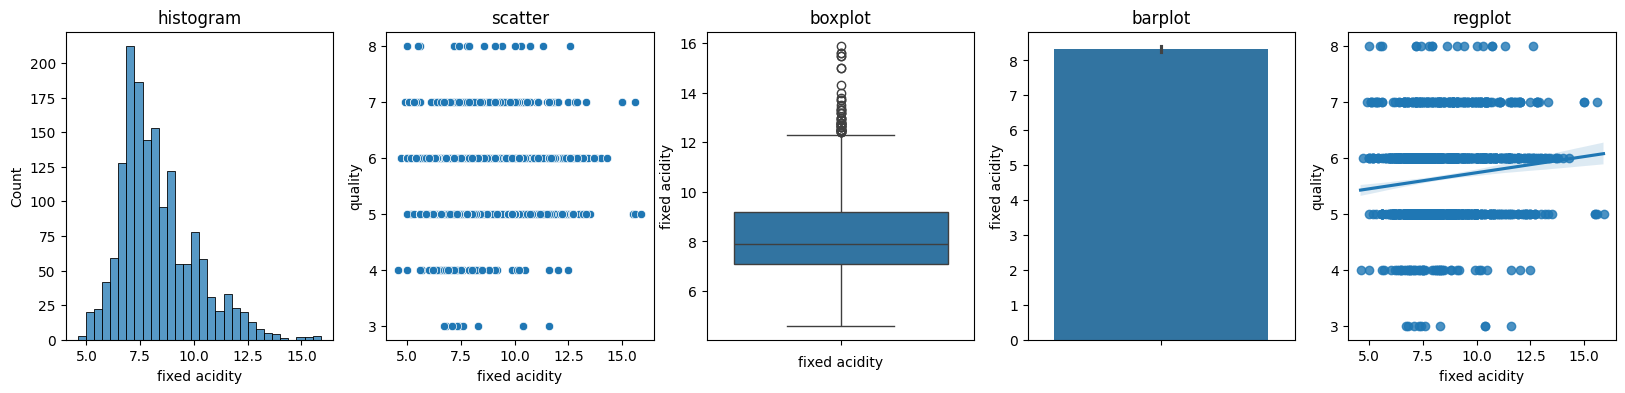

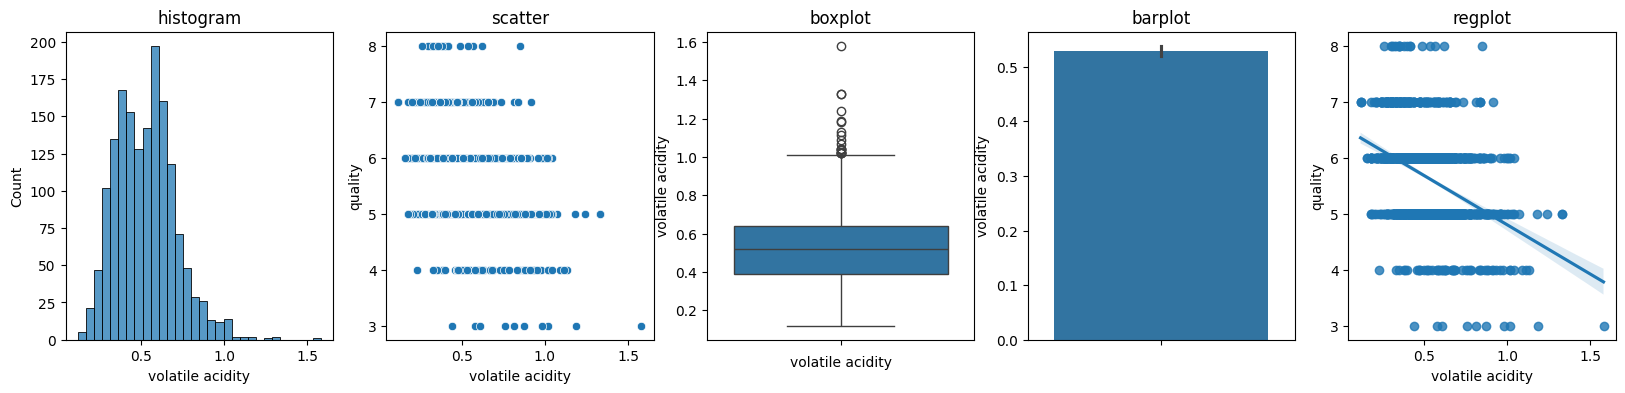

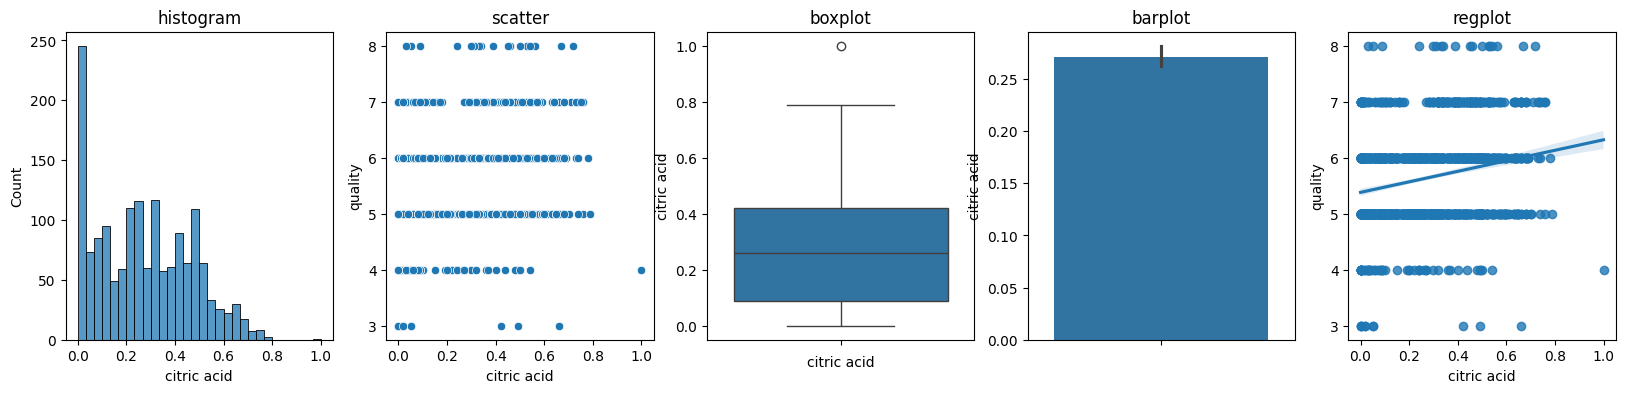

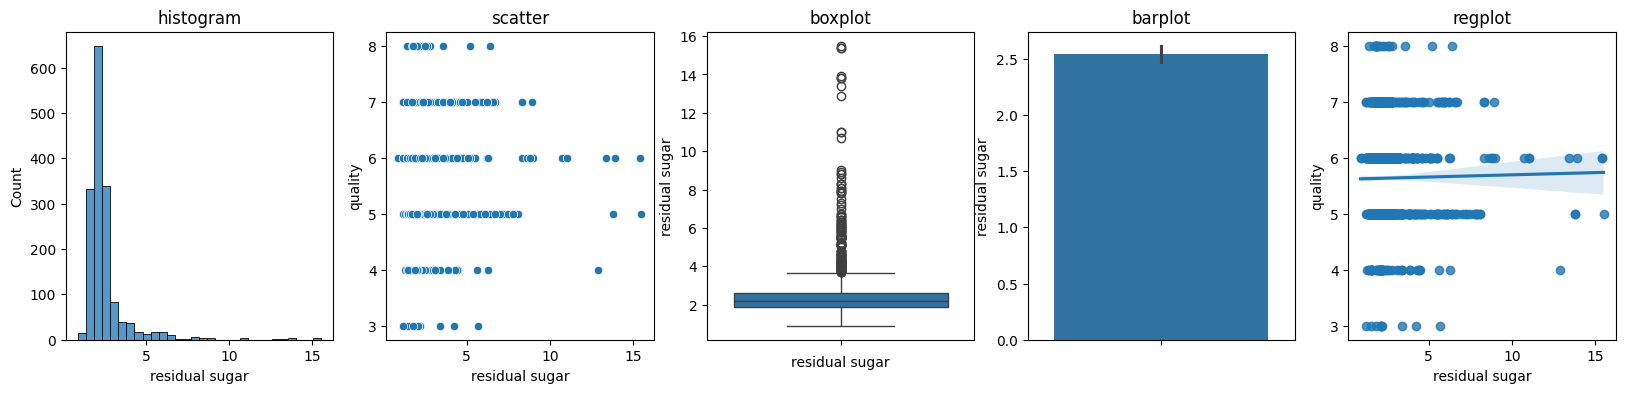

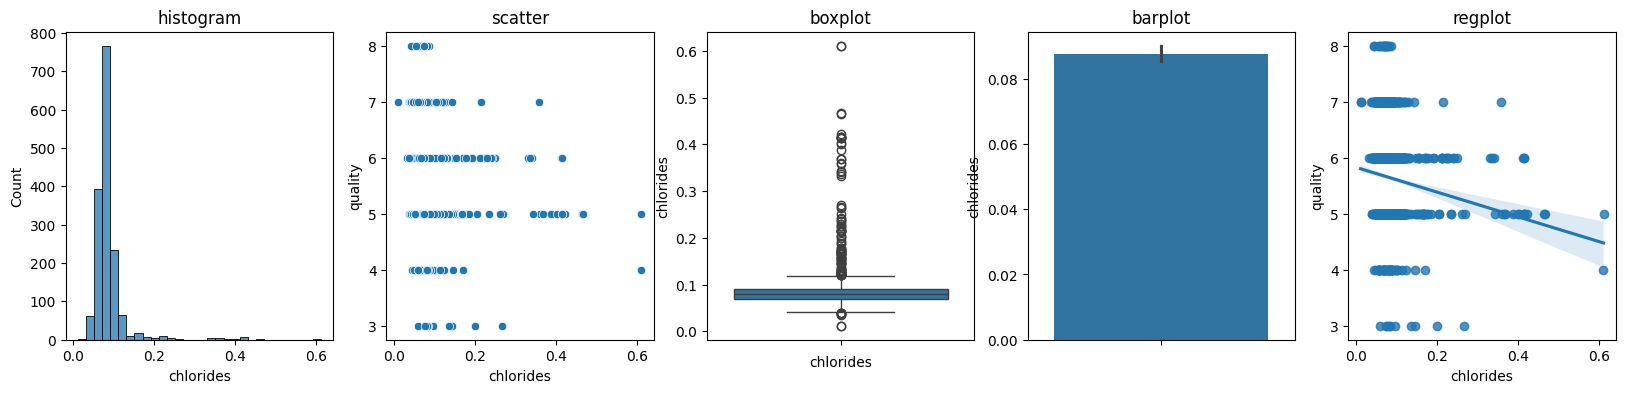

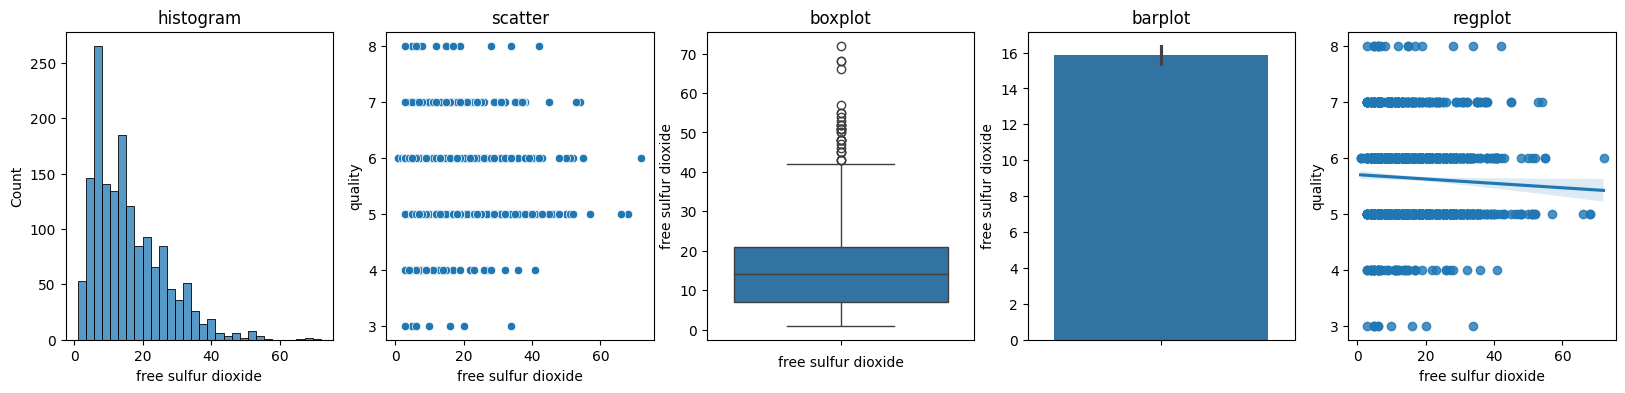

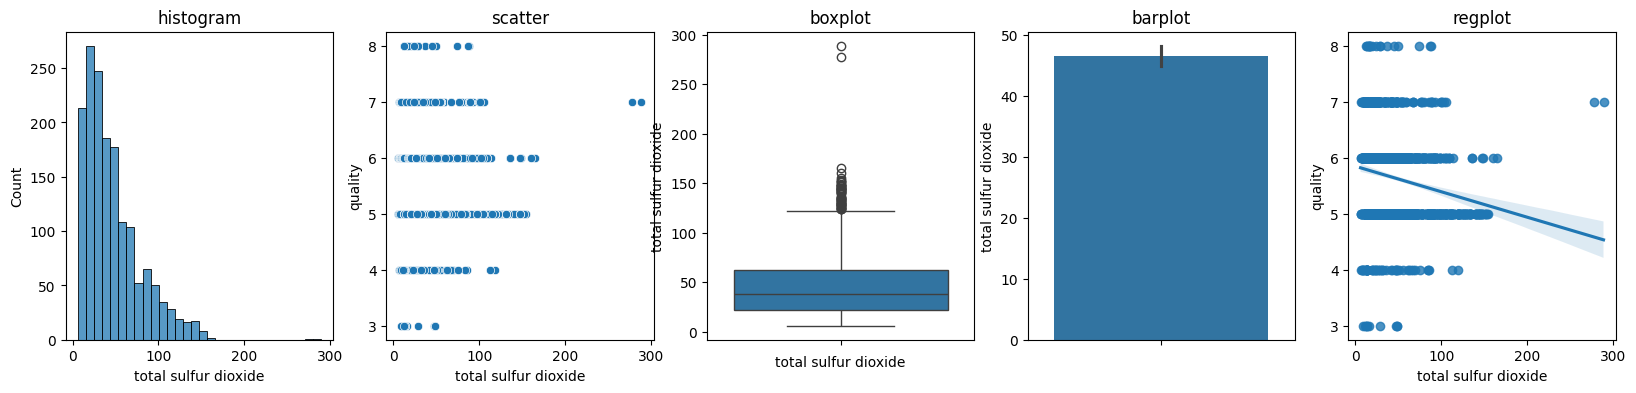

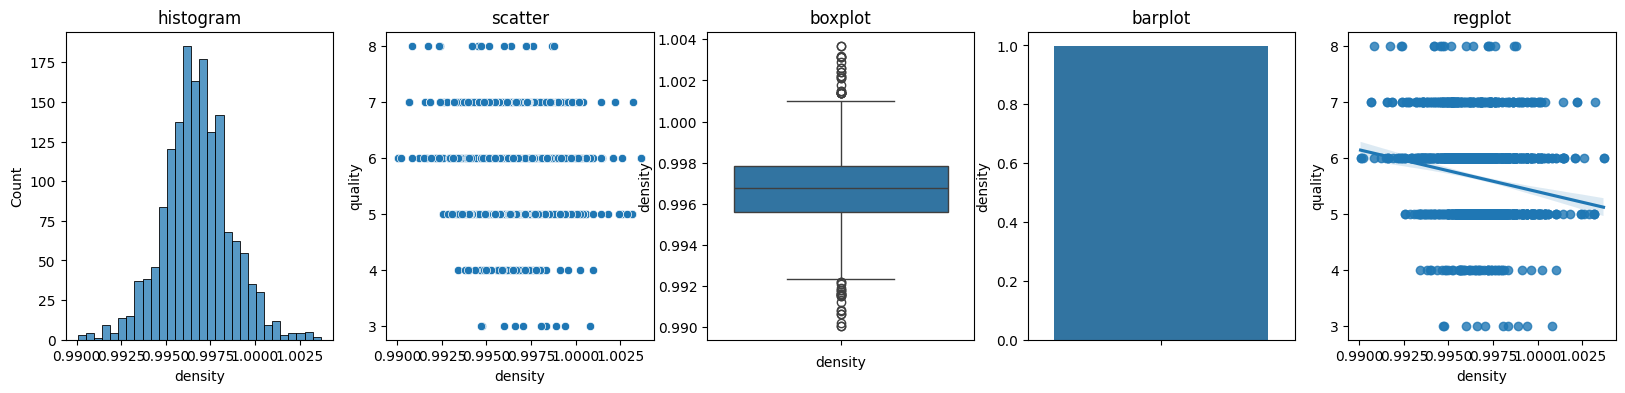

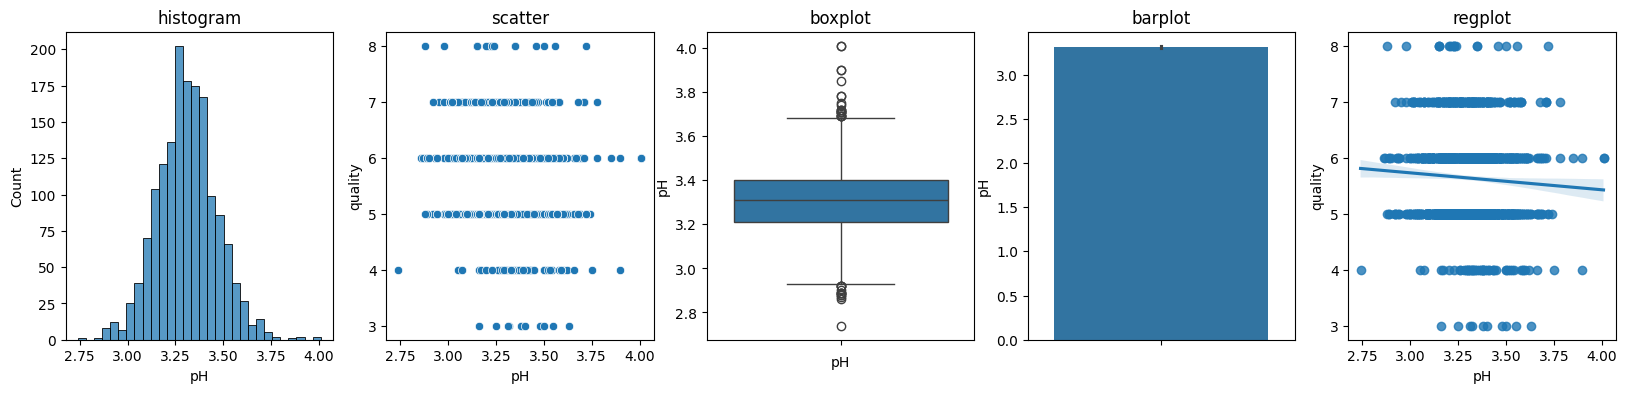

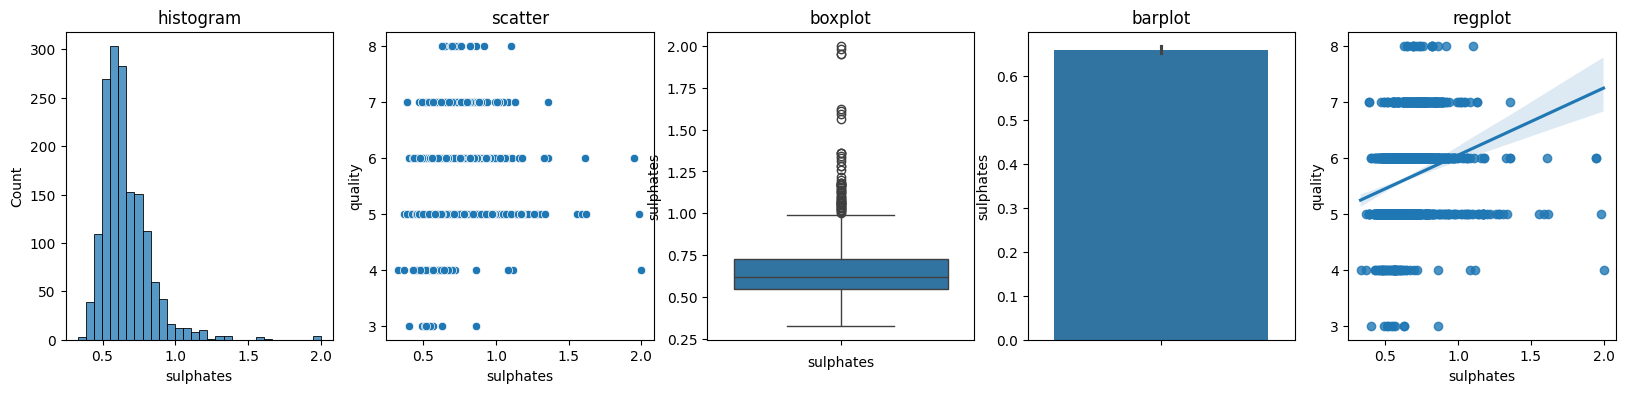

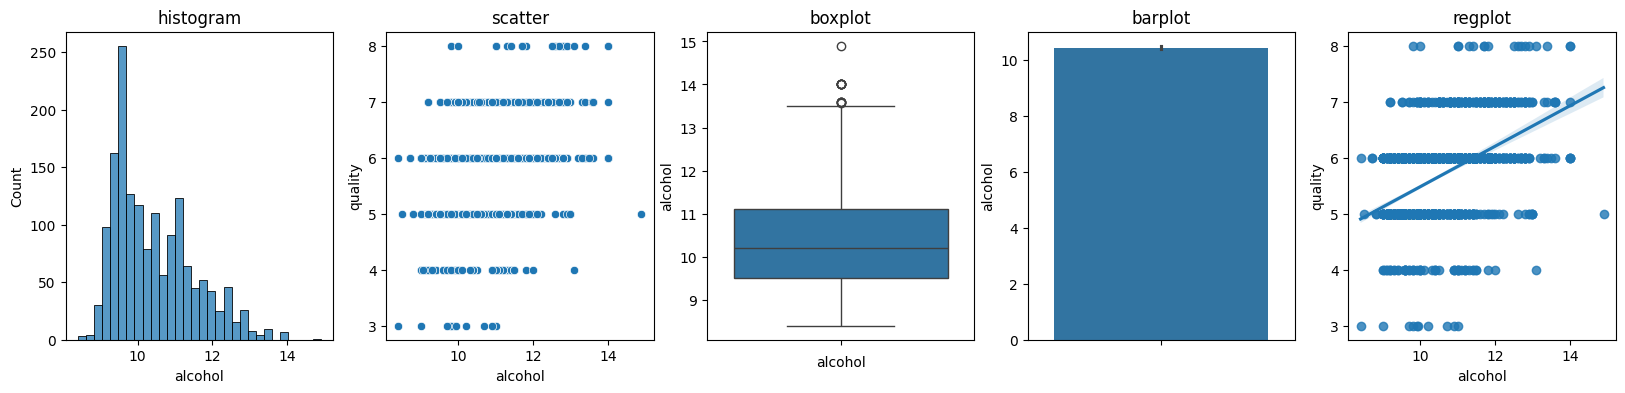

In [17]:

Features = data.columns[data.columns != 'quality']
for feature in Features:
    plot_dist(data, feature,'quality')

In [18]:
  #variable = np.log(df[variable])

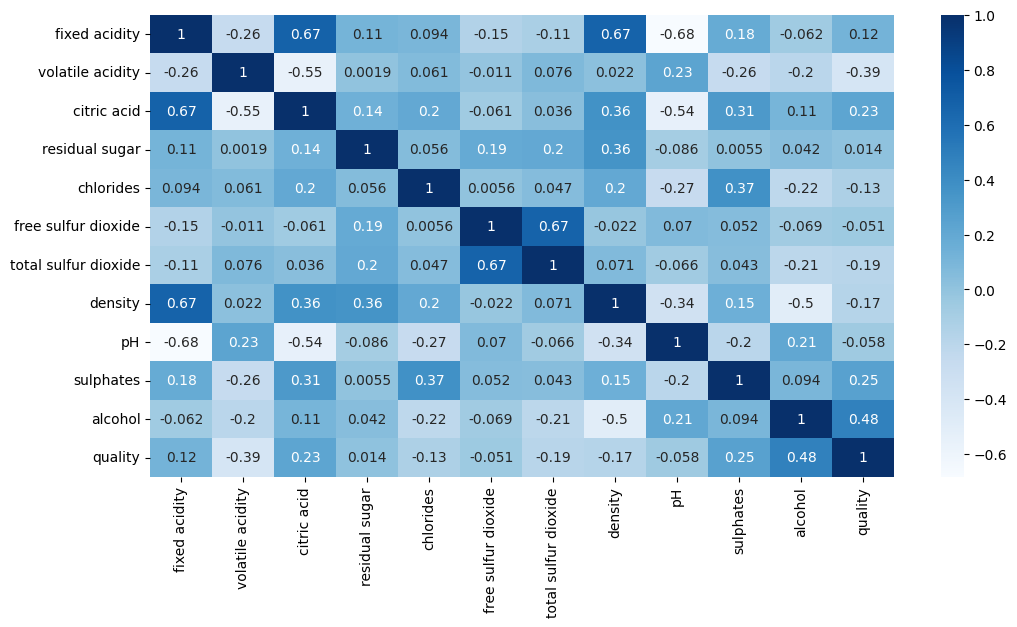

In [19]:

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.show()

In [20]:
LR = LinearRegression()

In [21]:
#linear regression without train_test_split
copy = data.copy()
X = copy.drop('quality',axis = 1)
y = copy['quality']
model = LR.fit(X,y)
y_predict = model.predict(X)
model.score(X,y)

0.3605517030386879

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 42)
LR.fit(X_train,y_train)
#LR.predict(X_train)
LR.predict(X_test)
test_score = LR.score(X_test,y_test)
test_score

0.3513885332505232